**Data Preparation**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

**Load Data**

In [18]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Data Preprocessing**

We will use:



*   Annual Income (k$)
*   Spending Score (1–100)







In [19]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**K-Means Clustering**

Find Optimal K (Elbow Method)

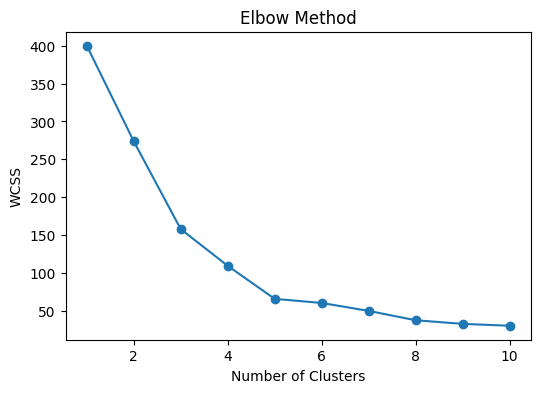

In [20]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Apply K-Means (Assume K=5)

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

df['KMeans_Cluster'] = kmeans_labels

print("Silhouette Score (KMeans):", silhouette_score(X_scaled, kmeans_labels))

Silhouette Score (KMeans): 0.5546571631111091


Visualize K-Means

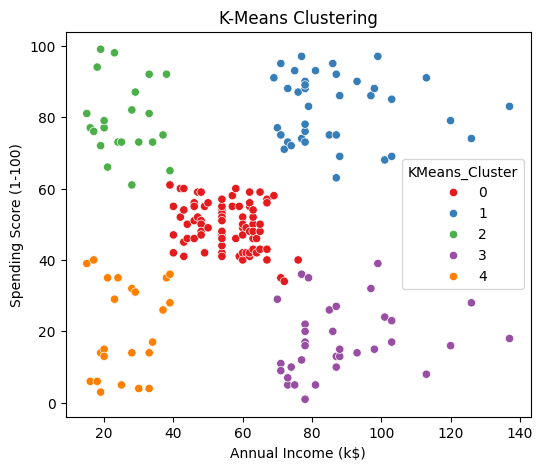

In [22]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['KMeans_Cluster'],
    palette='Set1'
)
plt.title("K-Means Clustering")
plt.show()

**DBSCAN**

Apply DBSCAN

In [24]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = db_labels

print("Silhouette Score (DBSCAN):",
      silhouette_score(X_scaled, db_labels) if len(set(db_labels)) > 1 else "Not valid")

Silhouette Score (DBSCAN): 0.35044619989666004


Visualize DBSCAN

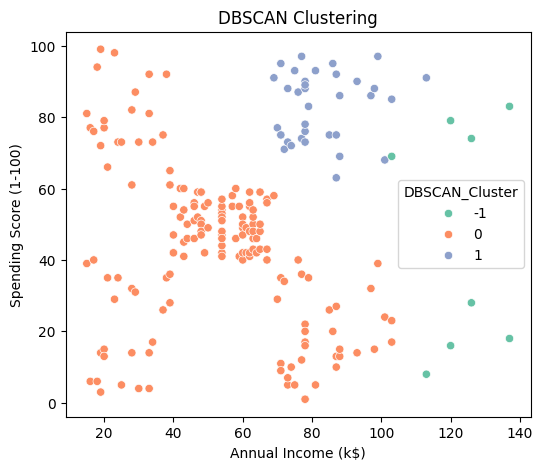

In [25]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['DBSCAN_Cluster'],
    palette='Set2'
)
plt.title("DBSCAN Clustering")
plt.show()

**Gaussian Mixture Model (GMM)**

Apply GMM

In [26]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

df['GMM_Cluster'] = gmm_labels

print("Silhouette Score (GMM):", silhouette_score(X_scaled, gmm_labels))

Silhouette Score (GMM): 0.5536892843811245


Visualize GMM

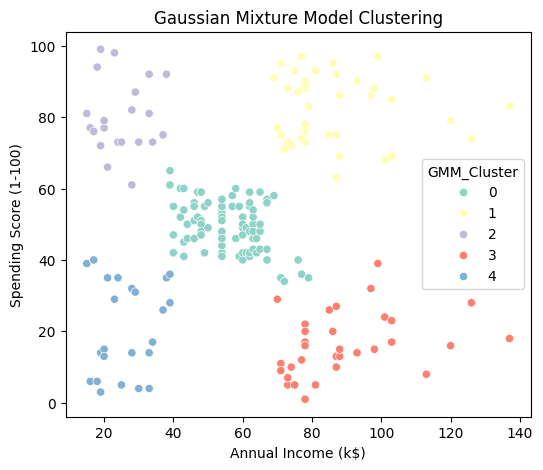

In [27]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['GMM_Cluster'],
    palette='Set3'
)
plt.title("Gaussian Mixture Model Clustering")
plt.show()

**PCA Visualization**

Apply PCA

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['KMeans'] = kmeans_labels
pca_df['DBSCAN'] = db_labels
pca_df['GMM'] = gmm_labels

PCA Plot (KMeans Example)

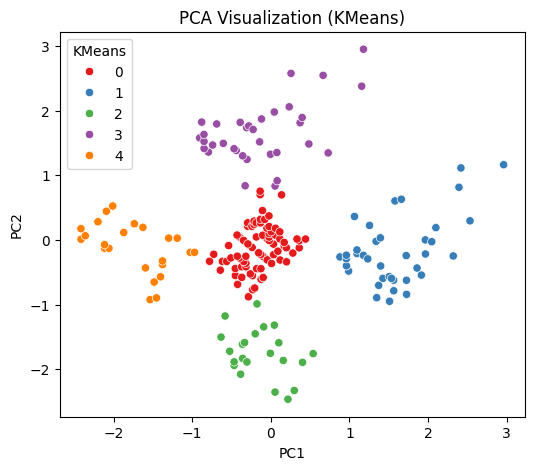

In [29]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=pca_df['PC1'],
    y=pca_df['PC2'],
    hue=pca_df['KMeans'],
    palette='Set1'
)
plt.title("PCA Visualization (KMeans)")
plt.show()

**Final Comparison**

In [30]:
print("Silhouette Scores:")
print("KMeans :", silhouette_score(X_scaled, kmeans_labels))
print("GMM     :", silhouette_score(X_scaled, gmm_labels))

Silhouette Scores:
KMeans : 0.5546571631111091
GMM     : 0.5536892843811245
